### IDs:
Insert yours IDs to the cell below

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm, geom
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()


**Answer 1.1**

In [23]:
print(f"number of Samples: {boston.data.shape[0]}")
print(f"number of Features: {boston.data.shape[1]}")

number of Samples: 506
number of Features: 13


In [24]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
boston_data = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


**All features are defined as floats**


In [26]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Answer 1.2**

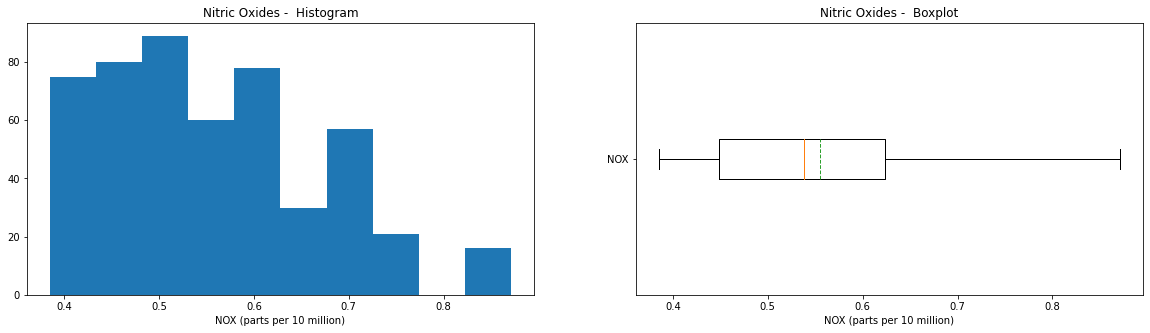

In [27]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax.hist(boston_data["NOX"], bins=10)
ax.set_xlabel("NOX (parts per 10 million)")
ax.set_title("Nitric Oxides -  Histogram")
ax2.boxplot(boston_data["NOX"], labels=["NOX"], vert=False, showmeans=True, showcaps=True, meanline = True)
ax2.set_xlabel("NOX (parts per 10 million)")
ax2.set_title("Nitric Oxides -  Boxplot")
plt.show()

The distribution is right skewed with a long tail to the right and, as such, with a median larger than the mean.
It resembles a log-normal distribution based only on the shape of the plot.

**Answer 1.3**

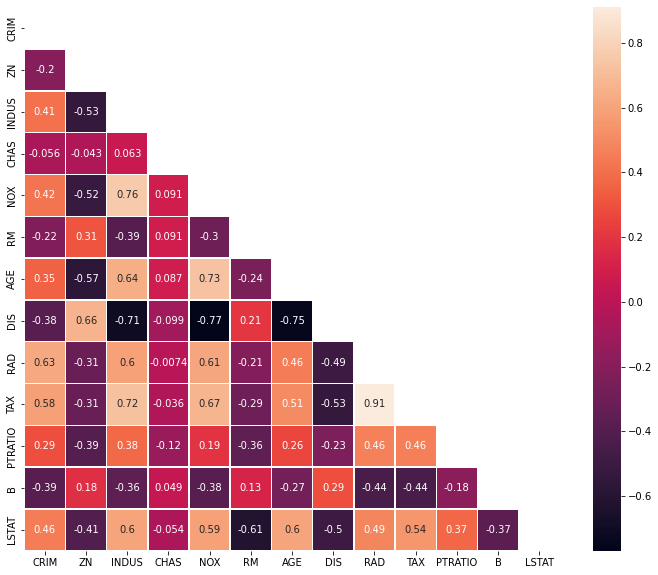

In [28]:
mask = np.zeros_like(boston_data.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (12,10))
sn.heatmap(boston_data.corr(), annot=True, mask = mask, linewidths=.5 );

In [29]:
# Top 10 correlations

corr_lower_triangle = boston_data.corr()
corr_lower_triangle[:] = np.tril(corr_lower_triangle, k=-1)
c = corr_lower_triangle.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so.head(10))

RAD    TAX    0.910228
NOX    DIS    0.769230
INDUS  NOX    0.763651
AGE    DIS    0.747881
NOX    AGE    0.731470
INDUS  TAX    0.720760
       DIS    0.708027
NOX    TAX    0.668023
ZN     DIS    0.664408
INDUS  AGE    0.644779
dtype: float64


From correlation matrix, we see the following: 
1.   TAX and RAD are very highly correlated.
2.   DIS and INDUS are highly correlated.
1.   DIS and NOX are highly correlated.
2.   DIS and AGE are highly correlated.
1.   INDUS and NOX are highly correlated.
2.   INDUS and TAX are highly correlated.

- CHAS feature get the values 0 or 1 and is categorical. We observe that CHAS is not corellated with any of the other features.

**Answer 1.4**

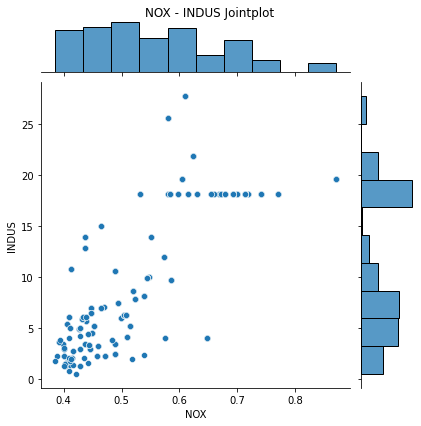

In [30]:
p = sn.jointplot(x= "NOX", y ="INDUS", data=boston_data, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("NOX - INDUS Jointplot")
p.fig.subplots_adjust(top=0.95)

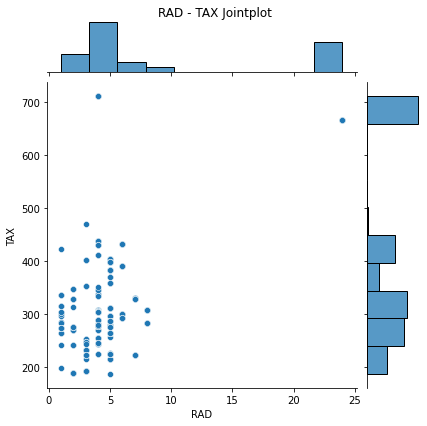

In [31]:
p = sn.jointplot(x= "RAD", y ="TAX", data=boston_data, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("RAD - TAX Jointplot")
p.fig.subplots_adjust(top=0.95)

**Answer 1.5**

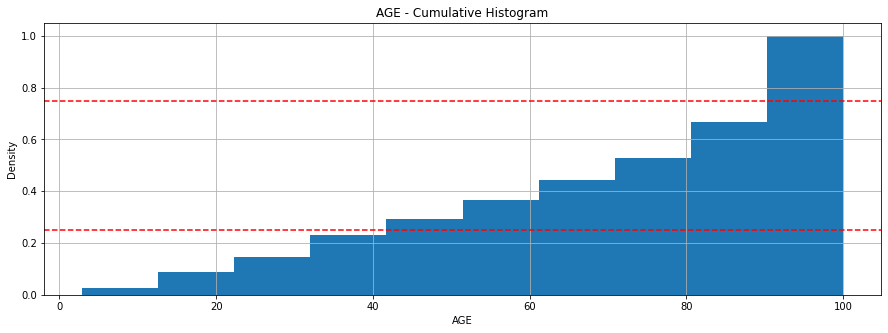

In [32]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

boston_data["AGE"].hist(density = True ,cumulative = True, bins=10)
plt.axhline(0.25, color='r', linestyle='--')
plt.axhline(0.75, color='r', linestyle='--')
ax.set_xlabel("AGE")
ax.set_ylabel("Density")
ax.set_title("AGE - Cumulative Histogram");

**Answer 1.6**

First intresting trend: 
> The NOX - DIS correlation
- We can see that there's a negative correlation between DIS and NOX. This makes sense since the closer you are to the employment centers the more industrial entities that emit and pollute Nitric Oxide Gas.


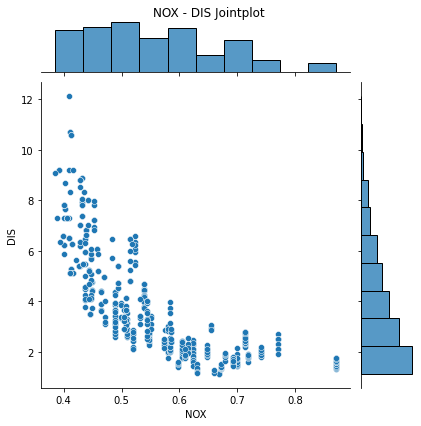

In [33]:
p = sn.jointplot(x= "NOX", y ="DIS", data=boston_data, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("NOX - DIS Jointplot")
p.fig.subplots_adjust(top=0.95)


Second intresting trend:

The RM - LSTAT correlation

We can see that there's a negative correlation between RM and LSTAT. This makes sense since the higher percentage of population with lower status the smaller the dwelling tends to be, i.e. smaller number of rooms per dwelling.

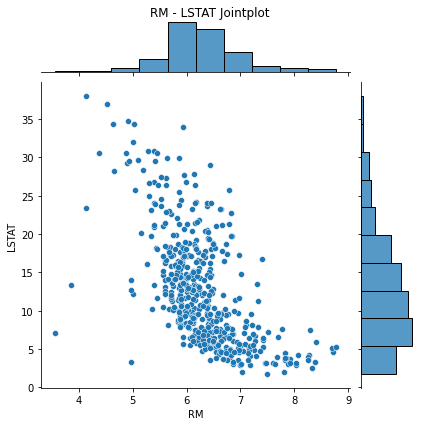

In [34]:
p = sn.jointplot(x= "RM", y ="LSTAT", data=boston_data, marginal_kws=dict(bins=10, fill=True))
p.fig.suptitle("RM - LSTAT Jointplot")
p.fig.subplots_adjust(top=0.95)

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

**Answer 2.A** <br/>
If the we don't have any information about the distributions, their joint distribution can be defined as:$$P(x,y,z)=P(x,y\mid z)P(z)$$

$P(x,y\mid z)$ - requires only n*m-1 paramters for each of z parameters thus $2*(n*m-1)$

$P(z)$ - requires only 1 paramter to define z distribution

thus, the total number of parameters needed to the define the joint distribution is $$2*(n*m-1)+1=2n*m-1$$

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

**Answer 2.B** <br/>
If the distribution are independent, their joint distribution can be defined as: $$P(x,y,z)=P(x)P(y)P(z)$$

$P(x)$ - requires only n-1 paramters to define x distribution

$P(y)$ - requires only m-1 paramters to define y distribution

$P(z)$ - requires only 1 paramter to define z distribution

Thus, the total number of parameters needed to the define the joint distribution is $$n-1+m-1+1=m+n-2$$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

**Answer 2.C** <br/>
if $x\perp y\mid z$ , their joint distribution can be defined as: $$P(x,y,z)=P(x,y\mid z)P(z)=P(x\mid z)P(y\mid z)P(z)$$

$P(x\mid z)$ - requires only n-1 paramters for each of z parameters thus $2*(n-1)$

$P(y\mid z)$ - requires only m-1 paramters for each of z parameters thus $2*(m-1)$

$P(z)$ - requires only 1 paramter to define z distribution

Thus, the total number of parameters needed to the define the joint distribution is $$2*(n-1)+2*(m-1)+1=2m+2n-3$$

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

**Answer 2.D**

$X$  and $Y $are independent, normal distributions ($N(0, 1)$).

Let $X+Y=Z$, then $Z\sim N(0,2)$

IF $X$ and $Y$ were conditionally independent given $Z$,   the two following definitions will be equivalent :

$P(X\mid Y,Z)=P(X\mid Z)$

Let $Z=2$ and $Y=1$ then $X=1$.

$P(X\mid Y,Z)=P(X=1\mid Y=1,Z=2)=100\%$

Whereas, $P(X=1\mid Z=2)\approx84\%$

$84\%\neq100\%. $

Thus $X$ and $Y$ are not conditionally independent given $Z$.


### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

**Answer 3.A:** <br/>
The first option is to use the expected value and variance equations to find the parameters: 
<br/><br/>$$E(X)=\sum_{i}w_{i}E(X_{i})$$

$$Var(X)=\sum_{i}w_{i}E((X_{i}-\mu_{i})^{2})+\sum_{i}w_{i}(\mu_{i}-\mu)^{2}$$

We can calculate the expected value and the variance of the GMM from the data in the CSV file.

$\mu\sim12.2$<br/>
$\sigma^{2}\sim17.57$

Thus we need to solve the following equations:

$12.2=4w_{1}+9*0.25+\mu_{3}w_{3}$

$17.57=0.5^{2}w_{1}+0.5^{2}*0.25+1.5^{2}w_{3}+w_{1}(4-12.2)^{2}+0.25(9-12.2)^{2}+w_{3}(\mu_{3}-12.2)^{2}$

We also know that $w_{1}+w_{2}+w_{3}=1$ so with $w_{2}=0.25,w_{1}=0.75-w_{3}$

After solving this equations, the result are:

$w_{1}=0.123$

$w_{3}=0.627$

$\mu_{3}=15.09$


The second option is to use EM to estimate the parameters:

In [35]:
# We don't change the given fixed parameters when we run the EM... 
dist1 = norm(4, 0.5)
dist2 = norm(9, 0.5)
dist3 = norm(13, 1.5)
distributions = {"dist1": [dist1, 0.15, 4, 0.5], "dist2": [dist2, 0.25, 9, 0.5], "dist3": [dist3, 0.6, 13, 1.5]}
gmm_data=pd.read_csv('GMD_2021.csv', sep=',',header=None, names=["sample"], usecols=range(1,2))

 # we could also have done it with some threshold as a stoping condition.
for i in range(5): 
    for key, dist in distributions.items():
        gmm_data[key] = gmm_data["sample"].apply(lambda x: dist[1]*dist[0].pdf(x))
    
    sample_prob = gmm_data.iloc[:,1:].sum(axis=1)
    
    for key in distributions.keys():
         gmm_data[key]=gmm_data[key]/sample_prob

    distributions["dist1"][1] = gmm_data["dist1"].sum()/len(gmm_data)
    distributions["dist3"][1] = 0.75 - distributions["dist1"][1]
    distributions["dist3"][2] = np.dot(gmm_data["sample"],gmm_data['dist3'] ) / (distributions["dist3"][1]*len(gmm_data))
    distributions["dist3"][0] = norm(distributions["dist3"][2],
                                     distributions["dist3"][3])

print(f' w1 = {distributions["dist1"][1].round(3)}')
print(f' w3 = {distributions["dist3"][1].round(3)}')
print(f' \u03BC3 = {distributions["dist3"][2].round(3)}')


 w1 = 0.125
 w3 = 0.625
 μ3 = 15.105


#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

**Answer 3.B** <br/> 

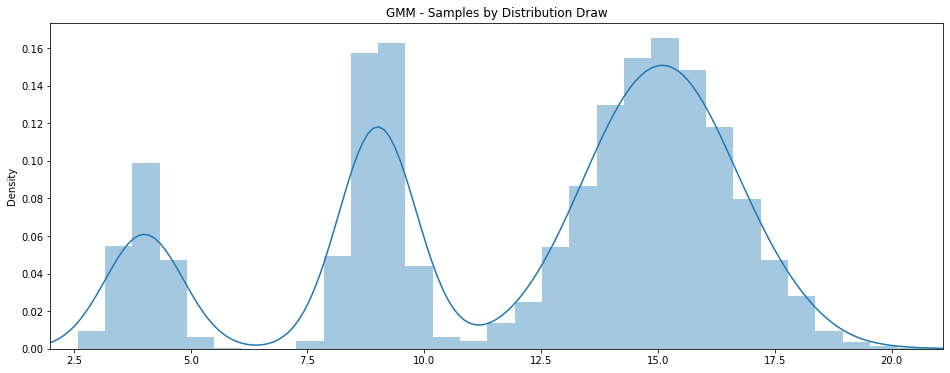

In [36]:
norm_params = np.array([[distributions["dist1"][2], distributions["dist1"][3]],[distributions["dist2"][2], distributions["dist2"][3]], [distributions["dist3"][2], distributions["dist3"][3]]])
weights = np.array([distributions["dist1"][1],distributions["dist2"][1],distributions["dist3"][1]])
dist_choices = np.random.choice(len(weights), size=10000, replace=True, p = weights)
samples = np.vectorize(lambda x: norm.rvs(loc=norm_params[x][0], scale=norm_params[x][1]))(dist_choices)
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.set_title('GMM - Samples by Distribution Draw')
bin_width= 2*(np.quantile(samples,0.75)-np.quantile(samples,0.25))/np.cbrt(len(samples))
bins_number = int(np.ceil((samples.max()-samples.min()) / bin_width))
ax.set_xlim(samples.min(), samples.max())
ax.set_xlim([distributions["dist1"][2]-distributions["dist1"][3]*4, distributions["dist3"][2]+distributions["dist3"][3]*4])
sn.distplot(samples, bins=bins_number);

We used Freedman-Diaconis rule in order to calculate the optimal number of bins.

We set the minimum and maximum values of X axis to be 3 standard deviations from the mean of the leftmost distribution and of the rightmost distribution respectively.

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

**Answer 3.C** <br/> 
In the case of $k=3$ we used the expected value and variance equations + $w_{1}=0.75-w_{3}$, resulting in 3 equations with 3 unknown parameters - which can be solved. 

When $k=4$: 

The equations needed to be solved are: 

$12.2=4w_{1}+9*0.25+\mu_{3}w_{3}+\mu_{4}w_{4}$

$17.57=0.5^{2}w_{1}+0.5^{2}*0.25+1.5^{2}w_{3}+\sigma_{4}^{2}w_{4}+w_{1}(4-12.2)^{2}+0.25(9-12.2)^{2}+w_{3}(\mu_{3}-12.2)^{2}+w_{4}(\mu_{4}-12.2)^{2}$

We also know that:

 $w_{1}+w_{2}+w_{3}+w_{4}=1$. 

 So with $w_{2}=0.25,  w_{1}=0.75-w_{3}-w_{4}$

Thus, there are 3 equations with 6 unknown parameters - which can not be solved. 


#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

**Answer 3.D:** <br/>
We can generate GMM data in two ways:


1. As their weights are equal, we can sample equal number of samples from each individual distribution and then concatenating them together.  
2. We draw a distribution, Based on their weights, and from that distribution   obtain a sample, we repeat doing that for N samples.




#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


**Answer 3.E:** 

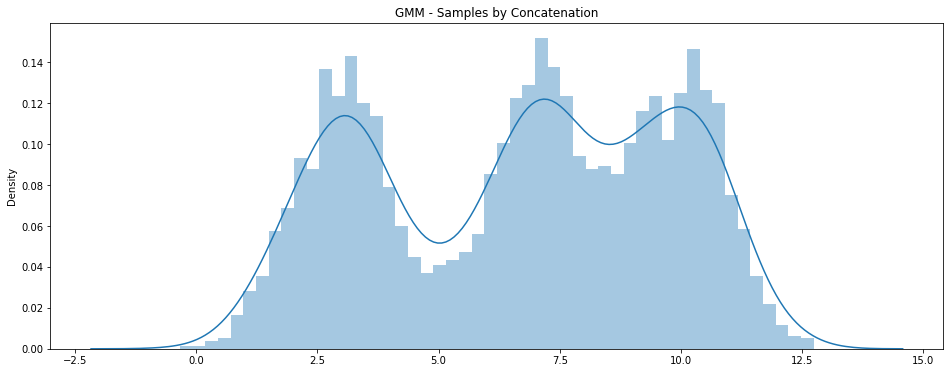

In [37]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
x1 = norm.rvs(loc=3, scale=1, size= 1000)
x2 = norm.rvs(loc=7, scale=1, size= 1000)
x3 = norm.rvs(loc=10, scale=1, size= 1000)
gmm_samples = np.concatenate([x1, x2, x3])
ax.set_title('GMM - Samples by Concatenation')
sn.distplot(gmm_samples, bins=50);


#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

**Answer 3.F:** <br/>

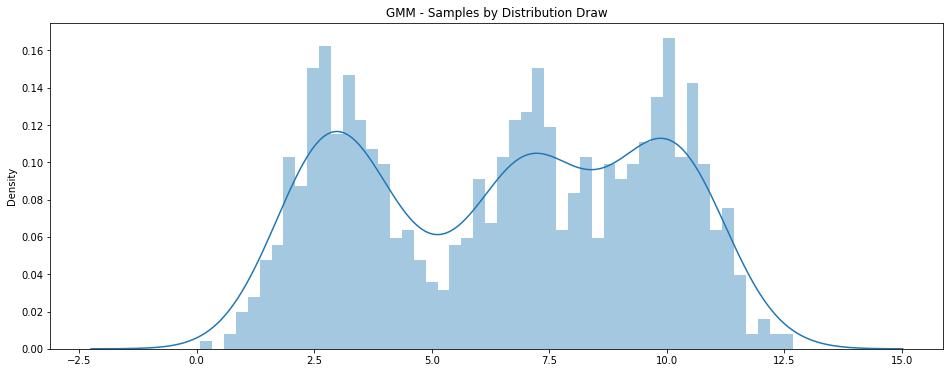

In [38]:
norm_params = np.array([[3, 1], [7, 1], [10, 1]])
weights = np.array([1/3,1/3,1/3])
dist_choices = np.random.choice(len(weights), size=1000, replace=True, p = weights)
samples = np.vectorize(lambda x: norm.rvs(loc=norm_params[x][0], scale=norm_params[x][1]))(dist_choices)
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax.set_title('GMM - Samples by Distribution Draw')
sn.distplot(samples, bins=50);

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

**Answer 4.A:** <br/>

In [39]:
x = norm(70000, 30000)
x.cdf(50000)

0.2524925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

**Answer 4.B:** <br/>

In [40]:
x.cdf(65000)-x.cdf(45000)

0.23148778642545326

#### 4.C
What percent of people earn more than 70,000 RCU?

**Answer 4.C:** <br/>

In [41]:
1-x.cdf(70000)

0.5

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

**Answer 4.D:** <br/>

In [42]:
round(1000*(1-x.cdf(140000)))

10

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

**Answer 5.A:** <br/>

In [43]:
def single_coupon_P(n):
    return [(n-i) / float(n) for i in range(n)]
    
def CT_mean(n):
    return sum([1.0 / p for p in single_coupon_P(n)])

#### 5.B
Write code to compute the exact value of $V(T_{N})$

**Answer 5.B:** <br/>

In [44]:
def CT_var(n):
    return sum([(1.0-p) / ( p ** 2) for p in single_coupon_P(n)])

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

**Answer 5.C:** <br/>

In [45]:
def coupon_collector_p_larger_than(successes, tries):
    p = single_coupon_P(successes)
    tries_range = np.arange(tries) + 1
    p_collector = conv_rec(p, tries_range)
    return 1 - p_collector[:tries - successes + 1].sum()

def conv_rec(p, tries_range):
    if len(p) == 1:
        return geom.pmf(tries_range, p[0])
    p_i = geom.pmf(tries_range, p[0])
    return np.convolve(p_i, conv_rec(p[1:], tries_range))

In [46]:
print(coupon_collector_p_larger_than(30,60).round(3))

0.994


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

**Answer 5.D:** <br/>

Chebicheff inequality states: $$ P(|X - \mu| \ge \lambda) \le \frac{V(X)}{\lambda^2} $$

In our case we seek to find a boundary for $P(T>60)$:


$\lambda = \mu - 60 $
<br/>
$P(T>60) \geq P(\mu - (\mu - 60) < T < \mu + (\mu - 60)) = P(\mid T-\mu \mid < (\mu - 60)) \geq 1- \frac{V(X)}{(\mu - 60)^2} $

Thus, $P(T>60) \geq 1- \frac{V(X)}{(\mu - 60)^2} $
<br/>
<br/>
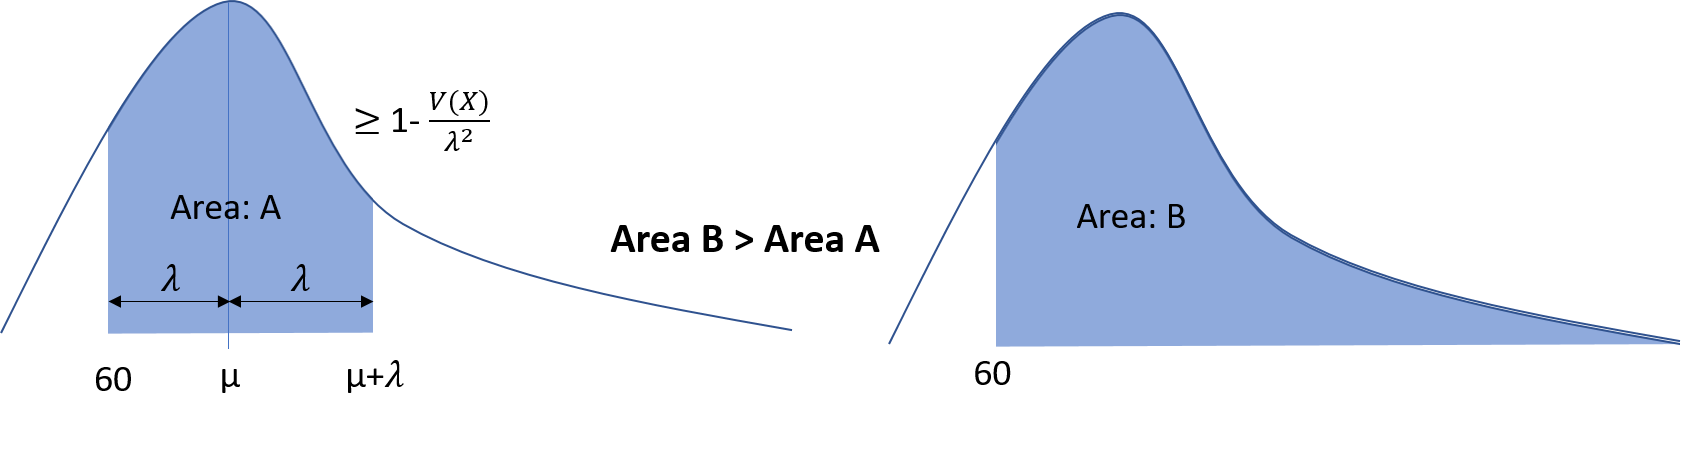

In [47]:
mean = CT_mean(30)
var = CT_var(30)
gamma = 60 - mean
lower_bound = 1- var / gamma**2
print(f'the Chebicheff Lower bound is {lower_bound:.2f}') 

the Chebicheff Lower bound is 0.63
